# Nuvem de palavras

In [3]:
#!pip install newspaper3k
#!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from string import punctuation


STOPWORDS=set(stopwords.words('portuguese') + list(punctuation))

def create_word_cloud(string):
   maskArray = np.array(Image.open("assets/cloud.jpg"))
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = STOPWORDS)
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')

### Usando [newspaper3k](https://newspaper.readthedocs.io/en/latest/) para obter páginas web no formato "artigo"

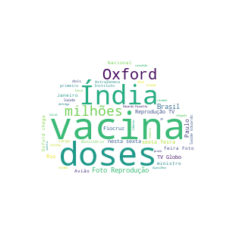

In [4]:
from newspaper import Article
article = Article('https://g1.globo.com/rj/rio-de-janeiro/noticia/2021/01/23/fiocruz-finaliza-analise-de-seguranca-e-libera-doses-para-distribuicao.ghtml', 'pt-br')
article.download()
article.parse()

create_word_cloud(article.text)

### Usando Dataset

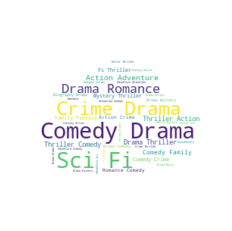

In [6]:
ds = pd.read_csv("datasets/movie_metadata.csv")
summary = ds.dropna(subset=['genres'], axis=0)['genres']

all_summary = " ".join(s for s in summary)
create_word_cloud(all_summary )